<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цели-и-описание-проекта" data-toc-modified-id="Цели-и-описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Цели и описание проекта</a></span><ul class="toc-item"><li><span><a href="#Обзор-и-подготовка-данных" data-toc-modified-id="Обзор-и-подготовка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обзор и подготовка данных</a></span></li></ul></li><li><span><a href="#Приоретизация-гипотез" data-toc-modified-id="Приоретизация-гипотез-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Приоретизация гипотез</a></span></li><li><span><a href="#Анализ-результатов-А/В-теста" data-toc-modified-id="Анализ-результатов-А/В-теста-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ результатов А/В теста</a></span><ul class="toc-item"><li><span><a href="#Проверка-данных" data-toc-modified-id="Проверка-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Проверка данных</a></span></li><li><span><a href="#Сбор-кумулятивных-данных" data-toc-modified-id="Сбор-кумулятивных-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Сбор кумулятивных данных</a></span></li><li><span><a href="#Визуализация-кумулятивных-данных" data-toc-modified-id="Визуализация-кумулятивных-данных-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Визуализация кумулятивных данных</a></span></li><li><span><a href="#Анализ-выбросов" data-toc-modified-id="Анализ-выбросов-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Анализ выбросов</a></span></li><li><span><a href="#Статистический-тест" data-toc-modified-id="Статистический-тест-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Статистический тест</a></span><ul class="toc-item"><li><span><a href="#Проверка-сырых-данных" data-toc-modified-id="Проверка-сырых-данных-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Проверка сырых данных</a></span></li><li><span><a href="#Проверка-на-очищенных-данных" data-toc-modified-id="Проверка-на-очищенных-данных-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Проверка на очищенных данных</a></span></li></ul></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Принятие решений в бизнесе

## Цели и описание проекта

Предоставлены данные о заказах и посетителях крупного интернет-магазина. Пользователи в предоставленных данных уже разделены на группы, т.е. предполагается, что проводится оценка до введения изменений и после них. Также есть информация о некоторых маркетинговых активностях, призванных увеличить прибыльность магазина: есть файл с уже оцененными параметрами гипотез (охват, влияние, затраты).  
Требуется оценить эффективность проведенных мероприятий, а именно, повлияли ли изменения на пользовательские метрики, такие как средний чек и конверсия.

### Обзор и подготовка данных

Импорт библиотек

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st

Распаковка файла:

In [2]:
try:
    hypothesis = pd.read_csv(r'C:\Users\HP\Desktop\Yandex Analytics\Projects\Project_7_online_shop_AB_test\hypothesis.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')

try:
    orders = pd.read_csv(r'C:\Users\HP\Desktop\Yandex Analytics\Projects\Project_7_online_shop_AB_test\orders.csv')
except:
    orders = pd.read_csv('/datasets/orders.csv')

try:
    visitors = pd.read_csv(r'C:\Users\HP\Desktop\Yandex Analytics\Projects\Project_7_online_shop_AB_test\visitors.csv')
except:
    visitors = pd.read_csv('/datasets/visitors.csv')

Обзор данных:

In [3]:
def prep(data):
    '''
    Функция для вывода информации о датасете
    
    Принимает на вход датасет, на выходе выдает 10 первых строк датасета для предварительного просмотра,
    выводит общую информацию о количестве строк и типах данных, описание квартилей и средних для числовых значений,
    а также считает пропущенные значения и полные дубликаты в случае их наличия.
    '''
    
    display(data.head(10))
    print('-------------------------------------------------------------------------------------------------------------------')
    print('Общая информация')
    print(data.info())
    print('-------------------------------------------------------------------------------------------------------------------')
    print(data.describe())
    print('-------------------------------------------------------------------------------------------------------------------')
    print('Количество пропусков')
    print(data.isna().sum())
    print('Количество дублирующихся строк', data.duplicated().sum())

list_of_data = [hypothesis, orders, visitors]

for df in list_of_data:
    prep(df)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


-------------------------------------------------------------------------------------------------------------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
-------------------------------------------------------------------------------------------------------------------
           Reach     Impact  Confidence    Efforts
count   9.000000   9.000000    9.000000   9.000000
mean    4.777778   4.777778    5.555556   4.888889
std     3.153481   3.192874    3.045944   2.803767
min     1.000000   1.000000    1.000000   1.000000
25%     3.000000   3.000000    3.000000   3.000000
50%  

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


-------------------------------------------------------------------------------------------------------------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
-------------------------------------------------------------------------------------------------------------------
       transactionId     visitorId       revenue
count   1.197000e+03  1.197000e+03  1.197000e+03
mean    2.155621e+09  2.165960e+09  8.348006e+03
std     1.229085e+09  1.236014e+09  3.919113e+04
min     1.062393e+06  5.114589e+06  5.000000e+01
25%     1.166776e+09  1.111826e+09  1.22000

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


-------------------------------------------------------------------------------------------------------------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
-------------------------------------------------------------------------------------------------------------------
         visitors
count   62.000000
mean   607.290323
std    114.400560
min    361.000000
25%    534.000000
50%    624.500000
75%    710.500000
max    770.000000
-------------------------------------------------------------------------------------------------------------------
Количество пропусков
date        0
group       0
visitors    0
dtype: int64
Количество дублирующихся строк 0


На этапе первичного просмотра видим, что данные уже по большей части подготовлены к анализу, пропусков нет, типы данных корректные, кроме дат. Для дальнейшей работы требуется преобразовать даты в формат `datetime`, а также проверить на наличие выбросов.

Для собственного удобства я также преобразую названия столбцов. В таблице с гипотезами приведем названия к нижнему регистру, в таблице с заказами добавим нижнее подчеркивание в составных названиях столбцов.

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()
orders = orders.rename(columns = {'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

Преобразуем даты в формат `date`:

In [5]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Сомнения сразу вызывает столбец с выручкой в таблице заказов: в нем есть как очень небольшие значения (400), так и очень большие (13710). В дальнейшем нужно проверить, в каком диапазоне лежит основная масса значений, и отфильтровать выбросы, а пока примем к сведению, что выбросы есть и очистим их позже.

## Приоретизация гипотез

Предоставлен файл с оцененными по параметрам гипотезами, всего их 9. Приоретизируем их с помощью фреймворков ICE и RICE и определим, какие из гипотез являются наиболее значимыми.

*ICE и RICE - два фреймворка для принятия решений и оценки гипотез в бизнесе. В каждом из них идеи оцениваются по 3 параметрам (по 4 для RICE):  
*- Reach - охват;  
*- Impact - влияние на целевой показатель;  
*- Confidence - насколько мы уверены, что получим желаемый эффект;  
*- Efforts - затраты на реализацию идеи.  
Затем находится произведение параметров охвата, влияния и уверенности, и все это делится на усилия по реализации. Фреймворк ICE - это упрощенная вариация RICE. Параметр охвата Reach в нем считается частью Impact.*

Добавим в датафрейм с гипотезами столбцы с оценкой:

In [6]:
# добавляем оценку по методу ICE
hypothesis['ice'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(2)
# зададим максимальную ширину столбцов, чтобы отобразить все данные
pd.options.display.max_colwidth = 210
hypothesis.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


При использовании ICE наиболее приоритетными оказались три гипотезы:

In [7]:
pd.DataFrame(hypothesis.sort_values(by='ice', ascending=False)['hypothesis'].unique()[0:3])

,0
0,"Запустить акцию, дающую скидку на товар в день рождения"
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"


Приоритезируем по методу RICE:

In [8]:
# добавляем оценку по методу RICE
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


В случае с RICE наибольшую оценку получает одна гипотеза из 9. Две следующие гипотезы имеют значительно меньший вес:

In [9]:
pd.DataFrame(hypothesis.sort_values(by='rice', ascending=False)['hypothesis'].unique()[0:3])

,0
0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
1,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
2,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"


Оценив гипотезы двумя методами, видим, что по наибольшей оценке совпадают две из них:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;  
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.  

Гипотеза о запуске акции, дающей скидку на товар в день рождения, при оценке методом RICE получила невысокий балл, а гипотеза "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" напротив оказалась в лидерах.  
Метод RICE помимо влияния на пользователей и уверенности в гипотезе учитывает также охват, т.е. количество пользователей, которых затронут изменения. Соответственно, есть два варианта, почему так могло произойти: либо на реализацию кампании высокие затраты, либо кампания охватывает небольшое количество пользователей.  

Вероятно, реализация кампании, дающей скидку в день рождения, достаточно дорогая, поскольку для ее реализации требуется каким-то образом собрать данные о датах рождения пользователей и в дальнейшем хранить и отслеживать их. При этом, как мы помним, к сожалению день рождения только раз в году, а значит, охват будет небольшим.  
А вот добавление блока рекомендаций будет распространяться на всех пользователей, при том, что потратиться на его добавление нужно будет разово.

## Анализ результатов А/В теста

Предварительно проверим доступные данные. Поскольку А/В-тесты достаточно сложное и долгое мероприятие, при проведении теста бывает трудно соблюсти все условия. Проверим количество групп, распределение пользователей по группам, а также наличие пересекающихся пользователей в разных группах.

### Проверка данных

Подтверждаем количество групп - выведем уникальные значения из столбца `group`:

In [10]:
print('Перечень групп:', orders['group'].unique())

Перечень групп: ['B' 'A']


Ничего лишнего. Посмотрим на распределение количества пользователей по группам, просуммировав количество пользователей по каждой группе, и рассчитаем доли:

In [11]:
proportion = orders.pivot_table(index='group',
                                values = 'visitor_id',
                                aggfunc='nunique').reset_index()
proportion['users_ratio'] = (proportion['visitor_id'] / proportion['visitor_id'].sum()) * 100
proportion

,group,visitor_id,users_ratio
0,A,503,46.189164
1,B,586,53.810836


Видим, что количество пользователей по группам отличается на 7%. Проверим, не попадает ли кто-то из пользователей в обе группы. Создаем выборку уникальных id пользователей по группе В, т.к. она получилась больше:

In [12]:
unique_users_b = orders.query('group == "B"')['visitor_id'].unique()

Создаем срез пользователей из группы А, которые попали также в группу В, и находим в этом списке уникальные `id`:

In [13]:
duplicates = orders[
    np.logical_and(orders['group'] == "A",
                  orders['visitor_id'].isin(unique_users_b))
]

duplicates['visitor_id'].nunique()

58

Вот и нашли 58 пользователей, которые везде поспели. Работа на два фронта до добра не доведет, поэтому удалим эти строки.

In [14]:
# создаем список
emigrants = duplicates['visitor_id'].unique()
# фильтруем таблицу заказов
orders = orders[~orders['visitor_id'].isin(emigrants)]

Определим даты начала и окончания теста как минимальное и максимальное значение из столбца `date`:

In [15]:
print('Дата начала теста:', orders['date'].min())
print('Дата окончания теста:', orders['date'].max())

Дата начала теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00


С датами все в порядке, в датафрейме присутствуют данные только за те дни, которые были заявлены.

### Сбор кумулятивных данных

Результаты теста содержатся в таблицах с заказами и посетителями. Для анализа сначала рассчитаем кумулятивную выручку.  
Определим период проведения теста: создадим новый датафрейм с датами и группами теста из таблицы с заказами:

In [16]:
dates = orders[['date', 'group']].drop_duplicates()
dates

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


Судя по диапазону дат и количеству строк, тестирование продолжалось 1 месяц в течение августа. Теперь можно подсчитать агрегированное количество посетителей и сумму заказов по дням. Требуется собрать данные по каждому дню отдельно по каждой группе: количество уникальных посетителей, уникальных заказов, сумма выручки.  
Соберем данные о заказах в отдельную таблицу. Выберем данные о заказах в период проведения теста и рассчитаем по дням количество транзакций, количество уникальных посетителей и выручку:

In [17]:
orders_agg = dates.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                    orders['group'] == x['group'])].agg({'date': 'max',
                                                                         'group': 'max',
                                                                         'transaction_id': 'nunique',
                                                                         'visitor_id': 'nunique',
                                                                         'revenue': 'sum'}), axis=1)\
.sort_values(by=['date', 'group'])
orders_agg.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


Аналогичным образом собираем данные об общем количестве посетителей в группе в день:

In [18]:
visitors_agg = dates.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                      visitors['group'] == x['group'])].agg({'date': 'max',
                                                                             'group': 'max',
                                                                             'visitors': 'sum'}), axis=1)\
.sort_values(by=['date', 'group'])
visitors_agg.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединяем таблицы с данными о заказах и посетителях по дате и группе:

In [19]:
orders_agg = orders_agg.merge(visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])
orders_agg = orders_agg.rename(columns={'transaction_id': 'transactions', 'visitor_id': 'users'})
orders_agg.head()

,date,group,transactions,users,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


### Визуализация кумулятивных данных

Проверим, повлияли ли маркетинговые кампании на финансовые показатели. Для этого понадобятся данные о выручке и среднем чеке пользователей. Построим график кумулятивной выручки по группам. Для этого сначала выделим в отдельные датафреймы данные по группам А и В.

In [20]:
orders_agg_a = orders_agg.query('group == "A"')[['date', 'revenue', 'transactions']]
orders_agg_b = orders_agg.query('group == "B"')[['date', 'revenue', 'transactions']]

Строим графики выручки:

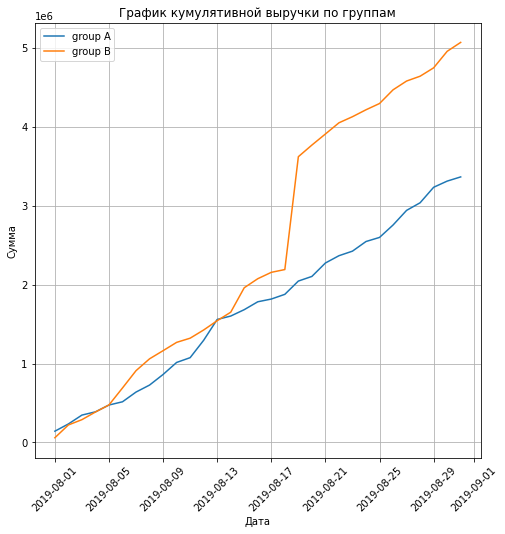

In [21]:
fig,ax = plt.subplots(figsize=(8,8))
plt.plot(orders_agg_a['date'], orders_agg_a['revenue'], label='group A')
plt.plot(orders_agg_b['date'], orders_agg_b['revenue'], label='group B')
plt.grid()
plt.legend()
plt.xticks(rotation=45)
ax.set_title('График кумулятивной выручки по группам')
ax.set_ylabel('Сумма')
ax.set_xlabel('Дата')
plt.show()

Видим, что выручка группы В (после изменений) стабильно превышает выручку по группе А, но на графике присутствует резкое увеличение значений в определенной точке из-за выбросов в данных. Проверим, как изменился средний чек. Добавим в таблицы по группам столбец с данными по среднему чеку:

In [22]:
orders_agg_a['avg_bill'] = orders_agg['revenue'] / orders_agg_a['transactions']
orders_agg_b['avg_bill'] = orders_agg['revenue'] / orders_agg_b['transactions']

Визуализируем динамику по среднему чеку:

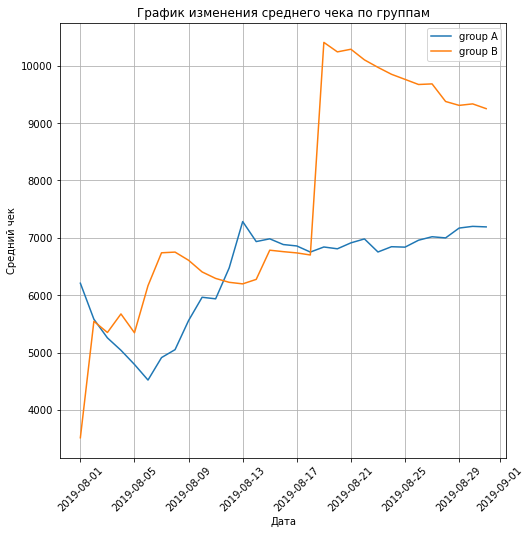

In [23]:
fig,ax = plt.subplots(figsize=(8,8))
plt.plot(orders_agg_a['date'], orders_agg_a['avg_bill'], label='group A')
plt.plot(orders_agg_b['date'], orders_agg_b['avg_bill'], label='group B')
plt.grid()
plt.legend()
plt.xticks(rotation=45)
ax.set_title('График изменения среднего чека по группам')
ax.set_ylabel('Средний чек')
ax.set_xlabel('Дата')
plt.show()

Видим, что начиная с середины периода средний чек по обеим группам становится равномерным, и похоже, что по группе В он должен быть немного выше. Однако выбросы и здесь сильно искажают результаты: сложно понять, будет ли лидировать чек по группе В, если устранить точечные крупные заказы.  
Рассчитаем относительное изменение среднего чека в группе В по отношению к группе А и построим график. Снова объединим датафреймы по группам и добавим столбец с отношением:

In [24]:
orders_agg_merged = orders_agg_a.merge(orders_agg_b,
                                       left_on='date',
                                       right_on='date', suffixes=['_a', '_b'])

orders_agg_merged['relative'] = (orders_agg_merged['avg_bill_b'] / orders_agg_merged['avg_bill_a']) - 1
orders_agg_merged.head(10)

,date,revenue_a,transactions_a,avg_bill_a,revenue_b,transactions_b,avg_bill_b,relative
0,2019-08-01,142779,23,6207.782609,59758,17,3515.176471,-0.433747
1,2019-08-02,234381,42,5580.500000,221801,40,5545.025000,-0.006357
2,2019-08-03,346854,66,5255.363636,288850,54,5349.074074,0.017831
3,2019-08-04,388030,77,5039.350649,385740,68,5672.647059,0.125670
4,2019-08-05,474413,99,4792.050505,475648,89,5344.359551,0.115255
5,2019-08-06,515332,114,4520.456140,690490,112,6165.089286,0.363820
6,2019-08-07,638580,130,4912.153846,909654,135,6738.177778,0.371736
7,2019-08-08,727219,144,5050.131944,1059795,157,6750.286624,0.336655
8,2019-08-09,861456,155,5557.780645,1162961,176,6607.732955,0.188916
9,2019-08-10,1013731,170,5963.123529,1268123,198,6404.661616,0.074045


Построим график относительного изменения:

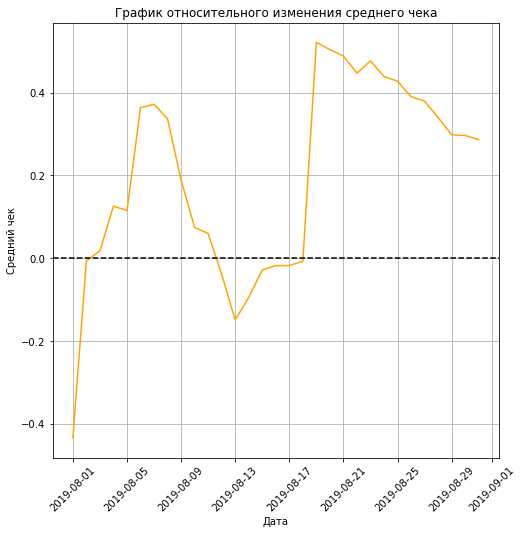

In [25]:
fig,ax = plt.subplots(figsize=(8,8))
plt.plot(orders_agg_a['date'], orders_agg_merged['relative'], color='orange')
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
ax.set_title('График относительного изменения среднего чека')
ax.set_ylabel('Средний чек')
ax.set_xlabel('Дата')
plt.show()

И этот график также подтверждает необходимость избавиться от выбросов. Посмотрим, произошло ли что-нибудь с конверсией. Добавим столбец в таблицу с агрегированными данными и снова разобьем на группы:

In [26]:
orders_agg['conversion'] = orders_agg['transactions'] / orders_agg['visitors']

In [27]:
orders_a = orders_agg.query('group == "A"')
orders_b = orders_agg.query('group == "B"')

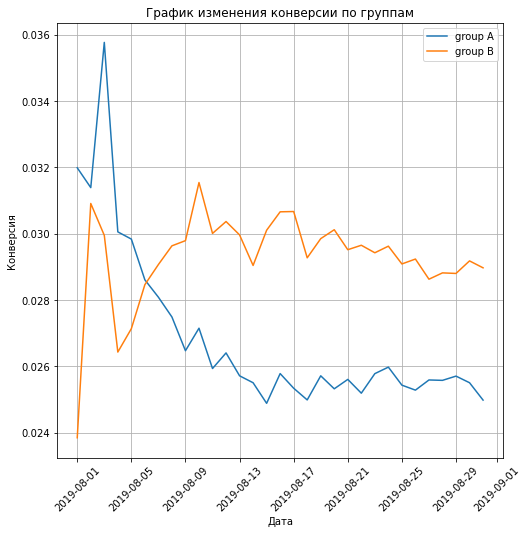

In [28]:
fig,ax = plt.subplots(figsize=(8,8))
plt.plot(orders_a['date'], orders_a['conversion'], label='group A')
plt.plot(orders_b['date'], orders_b['conversion'], label='group B')
plt.grid()
plt.legend()
plt.xticks(rotation=45)
ax.set_title('График изменения конверсии по группам')
ax.set_ylabel('Конверсия')
ax.set_xlabel('Дата')
plt.show()

Конверсии по группам практически сразу разошлись, при этом в целом конверсия группы В (0,34) выше, чем А (0,3), что также говорит о положительных изменениях. Также проанализируем относительное изменение конверсии:

In [29]:
conversion_merged = orders_a[['date', 'conversion']].merge(orders_b[['date', 'conversion']],
                                                           left_on='date',
                                                           right_on='date',
                                                           suffixes=['_a', '_b'])

conversion_merged['relative'] = (conversion_merged['conversion_b'] / conversion_merged['conversion_a']) - 1
conversion_merged.head()

,date,conversion_a,conversion_b,relative
0,2019-08-01,0.031989,0.023843,-0.254650
1,2019-08-02,0.031390,0.030912,-0.015235
2,2019-08-03,0.035772,0.029950,-0.162759
3,2019-08-04,0.030055,0.026428,-0.120659
4,2019-08-05,0.029837,0.027134,-0.090595


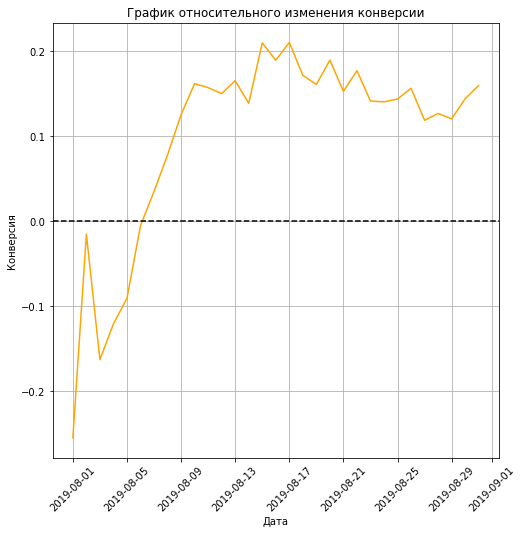

In [30]:
fig,ax = plt.subplots(figsize=(8,8))
plt.plot(conversion_merged['date'], conversion_merged['relative'], color='orange')
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
ax.set_title('График относительного изменения конверсии')
ax.set_ylabel('Конверсия')
ax.set_xlabel('Дата')
plt.show()

Конверсия группы В значительно возросла относительно конверсии группы А в определенный момент, некоторое время росла, но ближе к концу теста видим постепенное снижение. Также есть резкий скачок конверсии в самом начале, на что опять же могут влиять выбросы в данных.  
Очистим данные и проверим, насколько значительно изменятся результаты.

### Анализ выбросов

Как выяснили ранее, искать выбросы нужно среди стоимости заказов. Посчитаем количество заказов по пользователям и построим график:

In [31]:
orders_by_users = orders.groupby(by='visitor_id').agg({'transaction_id': 'nunique'}).reset_index()
orders_by_users.columns = ['user', 'order']
orders_by_users.head()

,user,order
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


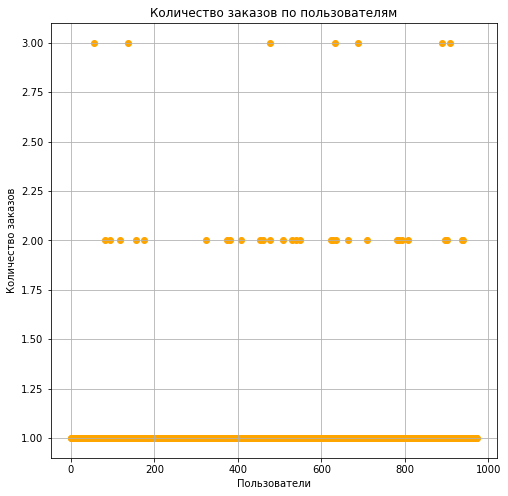

In [32]:
fig,ax = plt.subplots(figsize=(8,8))
x_values = pd.Series(range(0,len(orders_by_users['order'])))
plt.scatter(x_values, orders_by_users['order'], color='orange')
plt.grid()
ax.set_title('Количество заказов по пользователям')
ax.set_ylabel('Количество заказов')
ax.set_xlabel('Пользователи')
plt.show()

Большая часть пользователей делает заказ однократно, и основная масса заказов лежит в пределах от 1 до 2. Также есть некоторая часть пользователей, сделавших 3 заказа, но по графику сложно понять, насколько их много.  
Выведем доли пользователей по количеству сделанных заказов:

In [33]:
orders_ratio = orders_by_users.pivot_table(index='order',
                                           aggfunc='count').reset_index()
orders_ratio['ratio'] = (orders_ratio['user'] / orders_ratio['user'].sum()) * 100
orders_ratio

,order,user,ratio
0,1,937,96.300103
1,2,29,2.980473
2,3,7,0.719424


Для определения допустимого диапазона данных, которые можно отфильтровать, используем перцентили:

In [34]:
print(np.percentile(orders_by_users['order'], [95, 99]))

[1. 2.]


Основная масса пользователей, а именно 99% делает не более двух заказов, всех остальных можно отсеять.  
Теперь проанализируем данные по стоимости заказов. Построим точечную диаграмму:

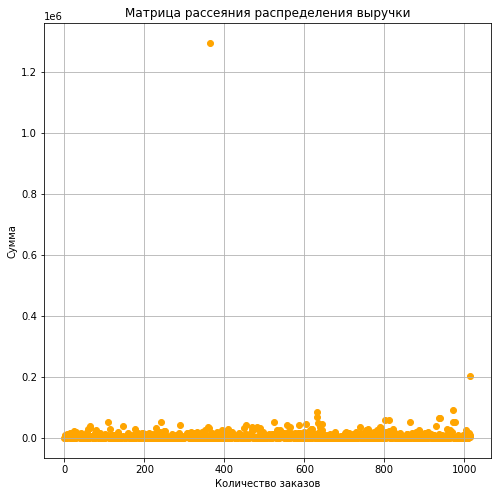

In [35]:
fig,ax = plt.subplots(figsize=(8,8))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color='orange')
plt.grid()
ax.set_title('Матрица рассеяния распределения выручки')
ax.set_ylabel('Сумма')
ax.set_xlabel('Количество заказов')
plt.show()

Сложно что-либо оценить, кроме того, что сумма выручки с основной массы заказов невелика) Если очень хорошо присмотреться, то увидим, что есть точечные заказы на крупные суммы.  
Функция describe в данном случае также не слишком поможет, хотя она и показывает распределение по квартилям:

In [36]:
orders['revenue'].describe()

count    1.016000e+03
mean     8.300815e+03
std      4.212199e+04
min      5.000000e+01
25%      1.190000e+03
50%      2.955000e+03
75%      8.134250e+03
max      1.294500e+06
Name: revenue, dtype: float64

Выведем отдельно максимальное, минимальное и среднее значение выручки для наглядности:

In [37]:
print('Минимальная сумма заказа:', orders['revenue'].min())
print('Максимальная сумма заказа:', orders['revenue'].max())
print('Среднее значение суммы заказа:', orders['revenue'].mean())
print('Медианное значение суммы заказа:', orders['revenue'].median())

Минимальная сумма заказа: 50
Максимальная сумма заказа: 1294500
Среднее значение суммы заказа: 8300.814960629921
Медианное значение суммы заказа: 2955.0


Определим диапазон значений с помощью `percentile`:

In [38]:
print(np.percentile(orders['revenue'], [95,99]))

[26785. 53904.]


Итак, 5% значений с выручкой более 26 785 руб, а 1% значений - более 53 904 руб. Наконец очистим данные:

In [39]:
orders_filtered = orders.query('revenue < 26785')
orders_filtered.shape

(965, 5)

In [40]:
print('Среднее значение после очистки:', orders_filtered['revenue'].mean())
print('Медианное значение после очистки:', orders_filtered['revenue'].median())

Среднее значение после очистки: 5035.3637305699485
Медианное значение после очистки: 2670.0


Разница в средних значениях очевидна, а медиана практически не сместилась. Проверим, есть ли различия в сырых и очищенных данных с помощью статистического теста.

### Статистический тест

#### Проверка сырых данных

Проведем статистический тест Манна-Уитни для проверки значимости различий в конверсии и среднем чеке между группами. Для начала определим, насколько значительна разница, на сырых данных.  
Проверим гипотезу о различии конверсии между группами:
- Н0: статистически значимых различий между группами нет (показатели равны);
- Н1: статистически значимые различия между группами есть.  

Соберем новые датафреймы с кумулятивным количеством посетителей по дням для каждой группы:

In [41]:
# делаем срез по группам из исходной таблицы с визитами
daily_visitors_a = visitors.query('group == "A"')[['date', 'visitors']]
daily_visitors_a.columns = ['date', 'daily_visitors_a']
daily_visitors_b = visitors.query('group == "B"')[['date', 'visitors']]
daily_visitors_b.columns = ['date', 'daily_visitors_b']

# считаем кумулятивное количество посетителей по дням
cumulative_visitors_a = daily_visitors_a.apply(
    lambda x: daily_visitors_a[daily_visitors_a['date'] <= x['date']]\
                                              .agg({'date': 'max','daily_visitors_a': 'sum'}), axis=1)
cumulative_visitors_a = cumulative_visitors_a.rename(columns={'daily_visitors_a': 'cumulative_visitors_a'})

cumulative_visitors_b = daily_visitors_b.apply(
    lambda x: daily_visitors_b[daily_visitors_b['date'] <= x['date']]\
                                              .agg({'date': 'max', 'daily_visitors_b': 'sum'}), axis=1)
cumulative_visitors_b = cumulative_visitors_b.rename(columns={'daily_visitors_b': 'cumulative_visitors_b'})
cumulative_visitors_a.head()

,date,cumulative_visitors_a
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


Сумма заказов по дням для каждой группы у нас уже есть в таблице `orders_agg_merged`. Сделаем срез из этой таблицы:

In [42]:
daily_orders_a = orders_agg_merged[['date', 'transactions_a', 'revenue_a']]
daily_orders_a.columns = ['date', 'orders_per_day_a', 'revenue_per_day_a']
daily_orders_b = orders_agg_merged[['date', 'transactions_b', 'revenue_b']]
daily_orders_b.columns = ['date', 'orders_per_day_b', 'revenue_per_day_b']
daily_orders_a.head()

,date,orders_per_day_a,revenue_per_day_a
0,2019-08-01,23,142779
1,2019-08-02,42,234381
2,2019-08-03,66,346854
3,2019-08-04,77,388030
4,2019-08-05,99,474413


Посчитаем кумулятивную сумму заказов по группам А и В:

In [43]:
cumulative_orders_a = daily_orders_a.apply(lambda x: daily_orders_a[daily_orders_a['date'] <= x['date']]\
                                          .agg({'date': 'max', 'orders_per_day_a': 'sum', 'revenue_per_day_a': 'sum'}), axis=1)
cumulative_orders_a.columns = ['date', 'cumulative_orders_a', 'cumulative_revenue_a']

cumulative_orders_b = daily_orders_b.apply(lambda x: daily_orders_b[daily_orders_b['date'] <= x['date']]\
                                          .agg({'date': 'max', 'orders_per_day_b': 'sum', 'revenue_per_day_b': 'sum'}), axis=1)
cumulative_orders_b.columns = ['date', 'cumulative_orders_b', 'cumulative_revenue_b']
cumulative_orders_a.head()

,date,cumulative_orders_a,cumulative_revenue_a
0,2019-08-01,23,142779
1,2019-08-02,65,377160
2,2019-08-03,131,724014
3,2019-08-04,208,1112044
4,2019-08-05,307,1586457


Объединим все полученные таблицы в один датафрейм. Последовательно присоединим все датафреймы по дате сначала для группы А, затем для В:

In [44]:
raw_data = cumulative_visitors_a.merge(daily_orders_a, left_on = 'date', right_on = 'date', how = 'left')\
.merge(cumulative_orders_a, left_on='date', right_on='date', how='left')\
.merge(daily_visitors_a, left_on='date', right_on='date', how='left')\
.merge(cumulative_visitors_b, left_on = 'date', right_on = 'date', how = 'left')\
.merge(daily_orders_b, left_on = 'date', right_on = 'date', how = 'left')\
.merge(cumulative_orders_b, left_on='date', right_on='date', how='left')\
.merge(daily_visitors_b, left_on='date', right_on='date', how='left')

In [45]:
raw_data.head()

,date,cumulative_visitors_a,orders_per_day_a,revenue_per_day_a,cumulative_orders_a,cumulative_revenue_a,daily_visitors_a,cumulative_visitors_b,orders_per_day_b,revenue_per_day_b,cumulative_orders_b,cumulative_revenue_b,daily_visitors_b
0,2019-08-01,719,23,142779,23,142779,719,713,17,59758,17,59758,713
1,2019-08-02,1338,42,234381,65,377160,619,1294,40,221801,57,281559,581
2,2019-08-03,1845,66,346854,131,724014,507,1803,54,288850,111,570409,509
3,2019-08-04,2562,77,388030,208,1112044,717,2573,68,385740,179,956149,770
4,2019-08-05,3318,99,474413,307,1586457,756,3280,89,475648,268,1431797,707


Создадим выборки для групп А и В. Сначала отдельно посчитаем количество заказов по каждому пользователю отдельно по каждой группе:

In [46]:
orders_by_users_a = orders.query('group == "A"').groupby(by='visitor_id').agg({'transaction_id': 'nunique'}).reset_index()
orders_by_users_a.columns = ['user', 'orders_by_users_a']

In [47]:
orders_by_users_b = orders.query('group == "B"').groupby(by='visitor_id').agg({'transaction_id': 'nunique'}).reset_index()
orders_by_users_b.columns = ['user', 'orders_by_users_b']

Для проверки критерием Манна-Уитни нужно создать выборку, в которой будет только количество заказов пользователей. Учтем пользователей, которые посещали магазин, но ничего не заказывали. Их ID будут в таблице с визитами, но не будет в таблице с заказами, соответственно, данные о заказах для таких пользователей нужно заполнить 0 по количеству пользователей.  
Создадим выборки для каждой группы. Добавим туда данные о заказах пользователей - возьмем только столбец с количеством заказов. Для пользователей, которые ничего не заказывали, рассчитаем их количество как разницу между посетителями в день и покупателями:

In [48]:
sample_a = pd.concat(
    [orders_by_users_a['orders_by_users_a'],
     pd.Series(
         0, index=np.arange(raw_data['daily_visitors_a'].sum() - len(orders_by_users_a['orders_by_users_a'])
                           ), name='orders')], axis=0)

In [49]:
sample_b = pd.concat(
    [orders_by_users_b['orders_by_users_b'],
     pd.Series(
         0, index=np.arange(raw_data['daily_visitors_b'].sum() - len(orders_by_users_b['orders_by_users_b'])
                           ), name='orders')], axis=0)

In [50]:
sample_a.head()

0    1
1    1
2    1
3    1
4    1
dtype: int64

Для каждой группы получили выборку, в которой число записей равно количеству пользователей, а сумма - числу заказов. По сути конверсия отражает, какое количество посетителей перешло в покупателей, т.е. ее можно рассчитать как сумму заказов деленную на количество строк. Для такого расчета подойдет расчет среднего. Вычислим относительный прирост конверсии в группе В относительно группы А:

In [51]:
relative_increment = (sample_b.mean() / sample_a.mean()) - 1
relative_increment

0.1597977924896936

Относительный прирост конверсии в группе В - 15,9%. Примем уровень значимости 0,05 и проведем статистический тест:

In [52]:
print("{0:.3f}".format(st.mannwhitneyu(sample_a, sample_b)[1]))

0.011


Получили p-value, которое значительно ниже уровня статистической значимости, т.е. нулевую гипотезу о том, что различий в конверсии между группами нет, следует отвергнуть. Об этом также говорит относительный прирост конверсии в 13,8%.

Проверим, есть ли различия в среднем чеке. Гипотезы:
- Н0: статистически значимых различий между группами нет (показатели равны);
- Н1: статистически значимые различия между группами есть.  

In [53]:
print('p-value:',\
      '{0:.3f}'.format(st.mannwhitneyu(orders.query('group == "A"')['revenue'], orders.query('group == "B"')['revenue'])[1]))
print('Относительный прирост среднего чека:',\
      '{0:.3f}'.format(orders.query('group == "B"')['revenue'].mean()/orders.query('group == "A"')['revenue'].mean()-1))

p-value: 0.829
Относительный прирост среднего чека: 0.287


Полученный результат говорит, что нулевую гипотезу об отсутствии различий в среднем чеке не следует отвергать: p-value значительно выше установленного уровня значимости. Однако относительный прирост среднего чека в группе В составляет 21,4%. Проверим, так ли это на очищенных от выбросов данных.

#### Проверка на очищенных данных

В предыдущем пункте установили границы допустимых значений:
- не более 2-х заказов на одного пользователя;
- сумма заказа не более 28 000;

Избавимся от аномалий и повторно проведем тест. Соберем данные об аномалиях в отдельный список. Объединяем данные о заказах из датафреймов с количеством заказов на пользователя по группам:

In [54]:
abnormal_users = pd.concat([orders_by_users_a.query('orders_by_users_a > 2')['user'],\
                           orders_by_users_b.query('orders_by_users_b > 2')['user']])

In [55]:
# получаем данные о дорогих заказах
limit = 28000
abnormal_orders = orders.query('revenue > @limit')['visitor_id']

Объединим данные о большом количестве заказов и о дорогих заказах в одну таблицу, а также удалим дубликаты, т.к. один пользователь может попасть в оба списка.

In [56]:
anomaly = pd.concat([abnormal_users, abnormal_orders], axis=0).drop_duplicates()

Проверим гипотезу о различии конверсии между группами на очищенных данных:
- Н0: статистически значимых различий между группами нет (показатели равны);
- Н1: статистически значимые различия между группами есть.  

Создаем новые выборки для очищенных данных, с условием, что ID пользователя не встречается в списке аномалий:

In [57]:
sample_a_filtered = pd.concat(
    [orders_by_users_a[np.logical_not(orders_by_users_a['user'].isin(anomaly))]['orders_by_users_a'],
     pd.Series(
         0,
         index=np.arange(raw_data['daily_visitors_a'].sum() - len(orders_by_users_a['orders_by_users_a'])),
         name='orders')], axis=0)

In [58]:
sample_b_filtered = pd.concat(
    [orders_by_users_b[np.logical_not(orders_by_users_b['user'].isin(anomaly))]['orders_by_users_b'],
     pd.Series(
         0,
         index=np.arange(raw_data['daily_visitors_b'].sum() - len(orders_by_users_b['orders_by_users_b'])),
         name='orders')], axis=0)

Аналогично предыдущему пункту проверяем с помощью статистического теста:

In [59]:
print('p-value:', "{0:.3f}".format(st.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('Относительный прирост конверсии:', "{0:.3f}".format((sample_b_filtered.mean() / sample_a_filtered.mean()) - 1))

p-value: 0.009
Относительный прирост конверсии: 0.189


На очищенных данных получаем тот же результат, что и на сырых: нулевую гипотезу следует отвергнуть, между группами существует различие конверсии. Относительный прирост конверсии группы В на очищенных данных даже больше, чем на сырых, и составляет 16,8%. Проверим, как изменился средний чек:

In [60]:
print('{0:.3f}'.format(st.mannwhitneyu(
    orders[
        np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id'].isin(anomaly)))
    ]['revenue'],
    orders[
        np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id'].isin(anomaly)))
    ]['revenue'])[1]))

0.762


In [61]:
print('{0:.3f}'.format(
    (orders[
        np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id'].isin(anomaly)))
    ]['revenue'].mean()/
    orders[
        np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id'].isin(anomaly)))
    ]['revenue'].mean()) - 1))

0.023


Снова получаем аналогичный результат: нулевую гипотезу не следует отвергать, существенных различий в среднем чеке между группами нет. Однако относительный прирост на очищенных данных куда ниже, чем на сырых, и составляет всего 2%, что только подтверждает выводы.

## Выводы

Очевидно, что маркетинговые кампании в целом принесли положительный результат:

- Между группами существуют значимые различия в конверсии: конверсия группы В выросла по отношению к конверсии группы А. Относительный прирост составил 18,5%, что говорит о том, что посетители стали чаще совершать покупки;
- При этом количество повторных покупателей невелико: 90% посетителей делают только один заказ, а два заказа делает уже всего 6,2%.

Если целью было увеличение выручки, то ожидания не оправдались:

- Средняя сумма заказа составляет 6536 руб. Есть отдельные заказы на крупные суммы, но их число недостаточно велико, чтобы стать закономерностью;
- После введения изменений средний чек в группе В практически не изменился, однако судя по графику изменения среднего чека, он достаточно стабилен и понемногу растет. Относительный прирост составляет 2,3%. 

Исходя из вышесказанного, проводить тест дальше не имеет смысла, его можно завершить и зафиксировать победу группы В (после изменений). 